# Classification on multi-feature dataset

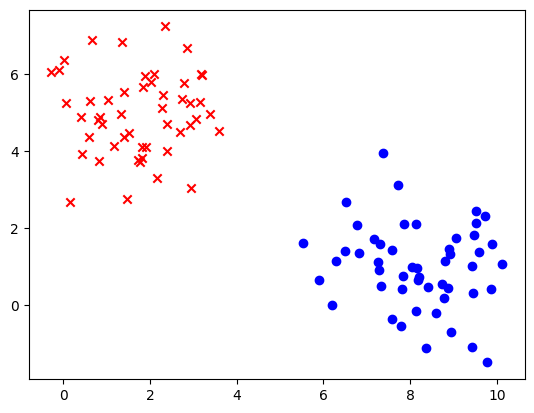

In [155]:
import numpy as np 
import matplotlib.pyplot as plt 

""" Making dataset """
N = 100
np.random.seed(69)

# np.random.normal(mean, standard deviation, number of elements)
X1 = np.concatenate([np.random.normal(2, 1, N//2), np.random.normal(8, 1, N - N//2)]).reshape(-1, 1)
X2 = np.concatenate([np.random.normal(5, 1, N - N//2), np.random.normal(1, 1, N//2)]).reshape(-1, 1)
Y = np.concatenate([np.zeros(N//2), np.ones(N - N//2)]).reshape(-1, 1)

# shuffle the data
idx = np.arange(len(X1))
np.random.shuffle(idx)

X1 = X1[idx]
X2 = X2[idx]
Y = Y[idx]

for i in range(N):
    if Y[i] == 0:
        plt.scatter(X1[i], X2[i], c='r', marker='x')
    else:
        plt.scatter(X1[i], X2[i], c='b', marker='o')

plt.show()

In [156]:
"""Rescaling"""
# X1
X1_mean = np.mean(X1)
X1_range = np.ptp(X1)

X1 -= X1_mean
X1 /= X1_range

# X2
X2_mean = np.mean(X2)
X2_range = np.ptp(X2)

X2 -= X2_mean
X2 /= X2_range

# Y
Y_mean = np.mean(Y)
Y_range = np.ptp(Y)

Y -= Y_mean
Y /= Y_range

In [157]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [158]:
w = np.random.uniform(low=-1, high=1, size=2)
b = np.random.uniform(low=-1, high=1)

X = np.concatenate((X1.reshape(1, N), X2.reshape(1, N)), axis=0)

def update(lr):
    global w, b

    Y_pred = sigmoid( np.dot(w, X) + b )

    dw = -np.sum( X @ (Y - Y_pred) ) / N
    db = -np.sum( (Y - Y_pred) ) / N

    w -= lr * dw
    b -= lr * db

    J = np.sum( (Y - Y_pred)**2 ) / (2*N)

    return J

In [159]:
lr = 0.01

J = [update(lr) for _ in range(2)]

while True:
    J.append(update(lr))

    if abs(J[-2] - J[-1]) < 10**(-3):
        print(f"Final cost = {J[-1]}. It took {len(J)} steps.")
        break

Final cost = 12.533856345615163. It took 54 steps.


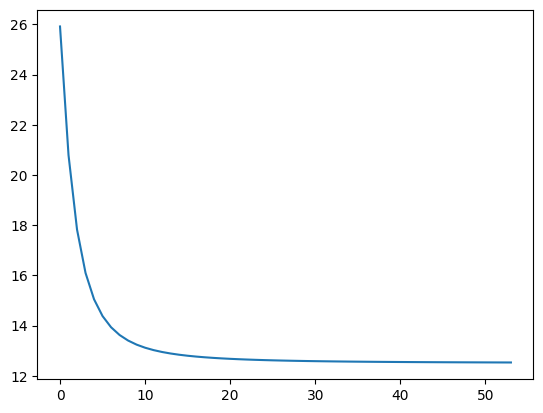

In [160]:
x = np.arange(len(J))

plt.plot(x, J)
plt.show()

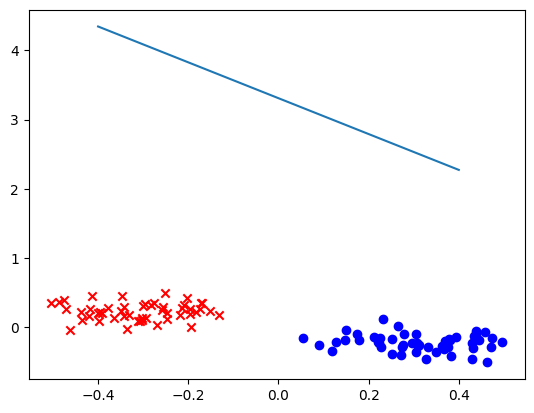

In [161]:
for i in range(N):
    if Y[i] < 0:
        plt.scatter(X1[i], X2[i], c='r', marker='x')
    else:
        plt.scatter(X1[i], X2[i], c='b', marker='o')

# draw the line: w1*x1 + w2*x2 + b = 0
# thats y = (-w1*x - b)/w2

x = np.linspace(-0.4, 0.4, 50)
y = -(w[0]*x + b)/w[1]

plt.plot(x, y)

plt.show()